# Data Wrangling

### Data Exploration

In [4]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
from library.sb_utils import save_file

import warnings
warnings.filterwarnings('ignore')

In [31]:
# load the data
data = pd.read_csv('LoanStats_2015_subset.csv')

This data is all about financial processes of individual people. The file named `LCDataDictionary.xlsx` contains detailed information about each column. 

Let's now explore the data and understand it:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 105 entries, acc_now_delinq to sec_app_mths_since_last_major_derog
dtypes: float64(85), object(20)
memory usage: 337.3+ MB


There are 105 columns in total, 85 of which are of float type and the rest 20 are of object type. 

In [9]:
data.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 421097 rows in total, i. e. so many clients with their personal and financial information. There are 105 columns in this table and each column contains some sort of information about the clients. We will try to see if any of these columns and rows contain any missing values.

In [11]:
data.isna().any().any()

True

Since the data is large and we have too many columns (pandas cannot display all columns), we can explore the columns in parts:

In [15]:
data.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   acc_now_delinq                  421095 non-null  float64
 1   acc_open_past_24mths            421095 non-null  float64
 2   addr_state                      421095 non-null  object 
 3   all_util                        21372 non-null   float64
 4   annual_inc                      421095 non-null  float64
 5   annual_inc_joint                511 non-null     float64
 6   application_type                421095 non-null  object 
 7   avg_cur_bal                     421095 non-null  float64
 8   bc_open_to_buy                  417132 non-null  float64
 9   bc_util                         416868 non-null  float64
 10  chargeoff_within_12_mths        421095 non-null  float64
 11  collections_12_mths_ex_med      421095 non-null  float64
 12  delinq_2yrs     

In [16]:
data.iloc[:,50:105].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   num_accts_ever_120_pd                421095 non-null  float64
 1   num_actv_bc_tl                       421095 non-null  float64
 2   num_actv_rev_tl                      421095 non-null  float64
 3   num_bc_sats                          421095 non-null  float64
 4   num_bc_tl                            421095 non-null  float64
 5   num_il_tl                            421095 non-null  float64
 6   num_op_rev_tl                        421095 non-null  float64
 7   num_rev_accts                        421094 non-null  float64
 8   num_rev_tl_bal_gt_0                  421095 non-null  float64
 9   num_sats                             421095 non-null  float64
 10  num_tl_120dpd_2m                     401865 non-null  float64
 11  num_tl_30dpd 

Let's explore the columns with object type of data and see if we really need them in our future models

In [18]:
data.select_dtypes(include=['object']).head()
# data.select_dtypes(object).head()

,addr_state,application_type,desc,earliest_cr_line,emp_length,emp_title,grade,home_ownership,id,initial_list_status,int_rate,issue_d,loan_status,purpose,revol_util,sub_grade,term,title,verification_status,zip_code
0,KS,Individual,NaN,Nov-2003,10+ years,Teacher,B,MORTGAGE,NaN,w,9.80%,Dec-2015,Fully Paid,debt_consolidation,13.4%,B3,60 months,Debt consolidation,Not Verified,660xx
1,VT,Individual,NaN,Feb-1996,1 year,Director,A,MORTGAGE,NaN,w,5.32%,Dec-2015,Current,credit_card,42.5%,A1,36 months,Credit card refinancing,Not Verified,054xx
2,IN,Individual,NaN,Oct-2002,10+ years,Engineer,D,MORTGAGE,NaN,w,18.49%,Dec-2015,Current,debt_consolidation,51.9%,D5,60 months,Debt consolidation,Verified,471xx
3,OH,Individual,NaN,Aug-1997,2 years,Vice-President,D,MORTGAGE,NaN,w,15.77%,Dec-2015,Fully Paid,home_improvement,50.3%,D1,36 months,Home improvement,Not Verified,430xx
4,FL,Individual,NaN,Jun-2006,< 1 year,RN,E,RENT,NaN,w,19.89%,Dec-2015,Current,credit_card,102.4%,E3,60 months,NaN,Verified,322xx


In [22]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

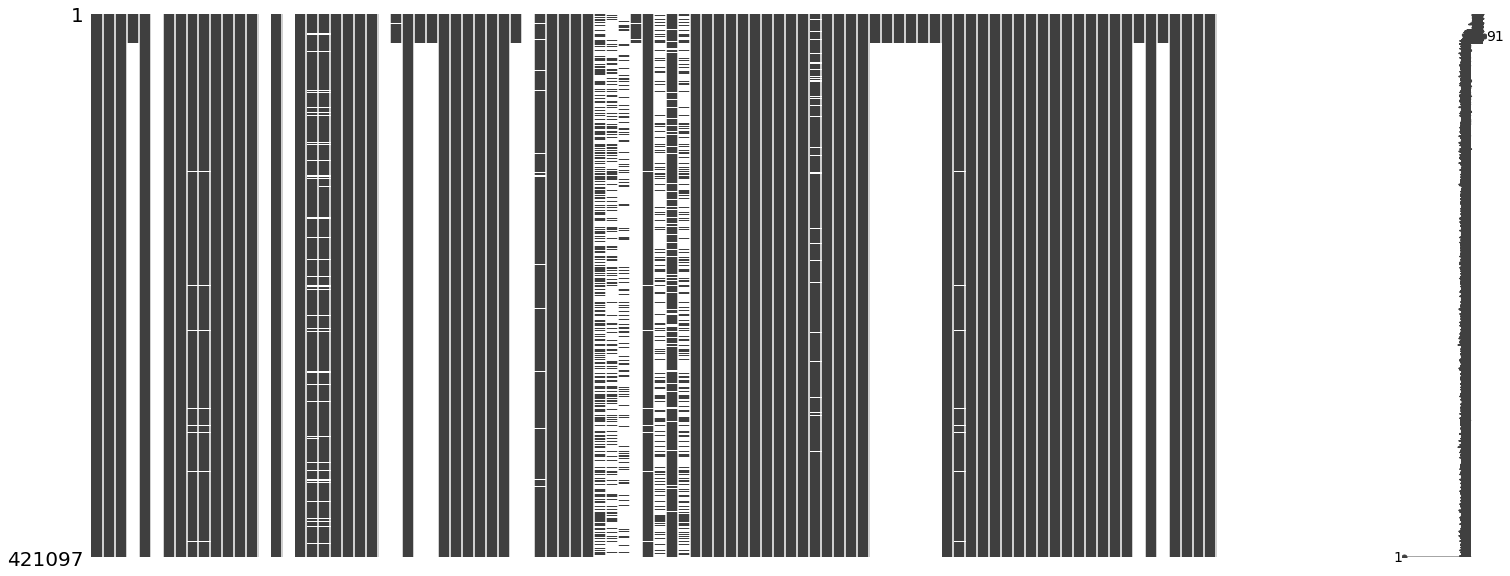

In [23]:
msno.matrix(data)

<AxesSubplot:>

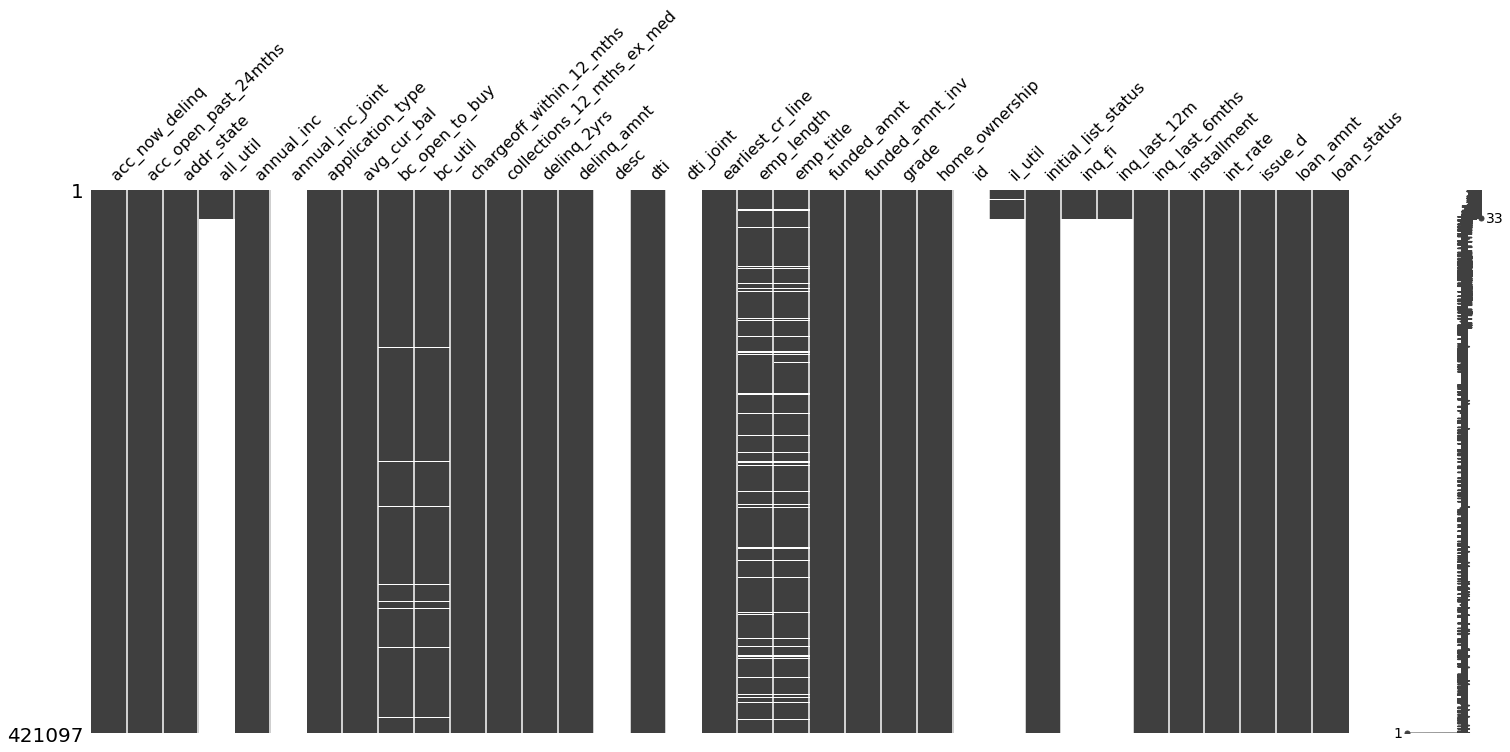

In [26]:
msno.matrix(data.iloc[:,0:35])

<AxesSubplot:>

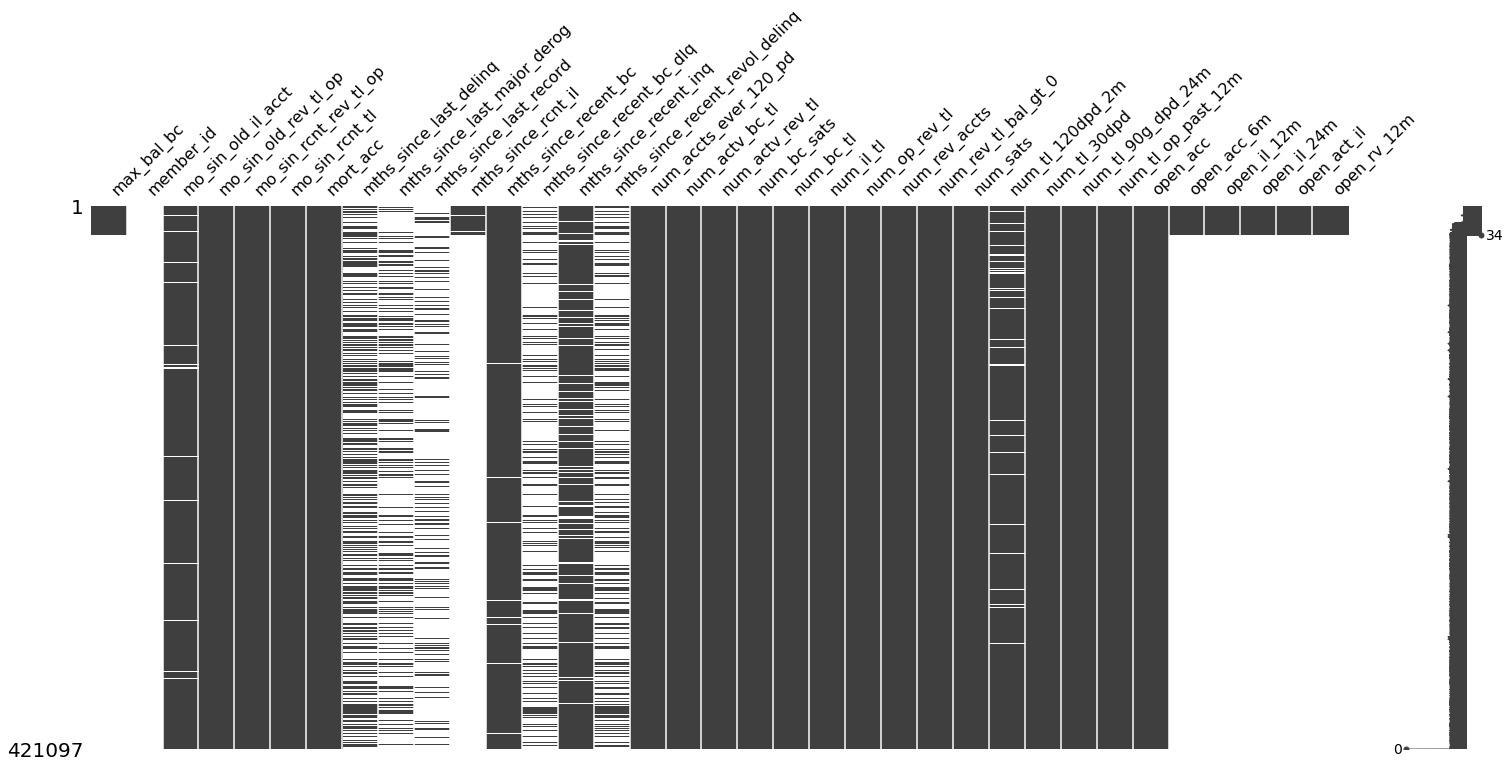

In [27]:
msno.matrix(data.iloc[:,35:70])

<AxesSubplot:>

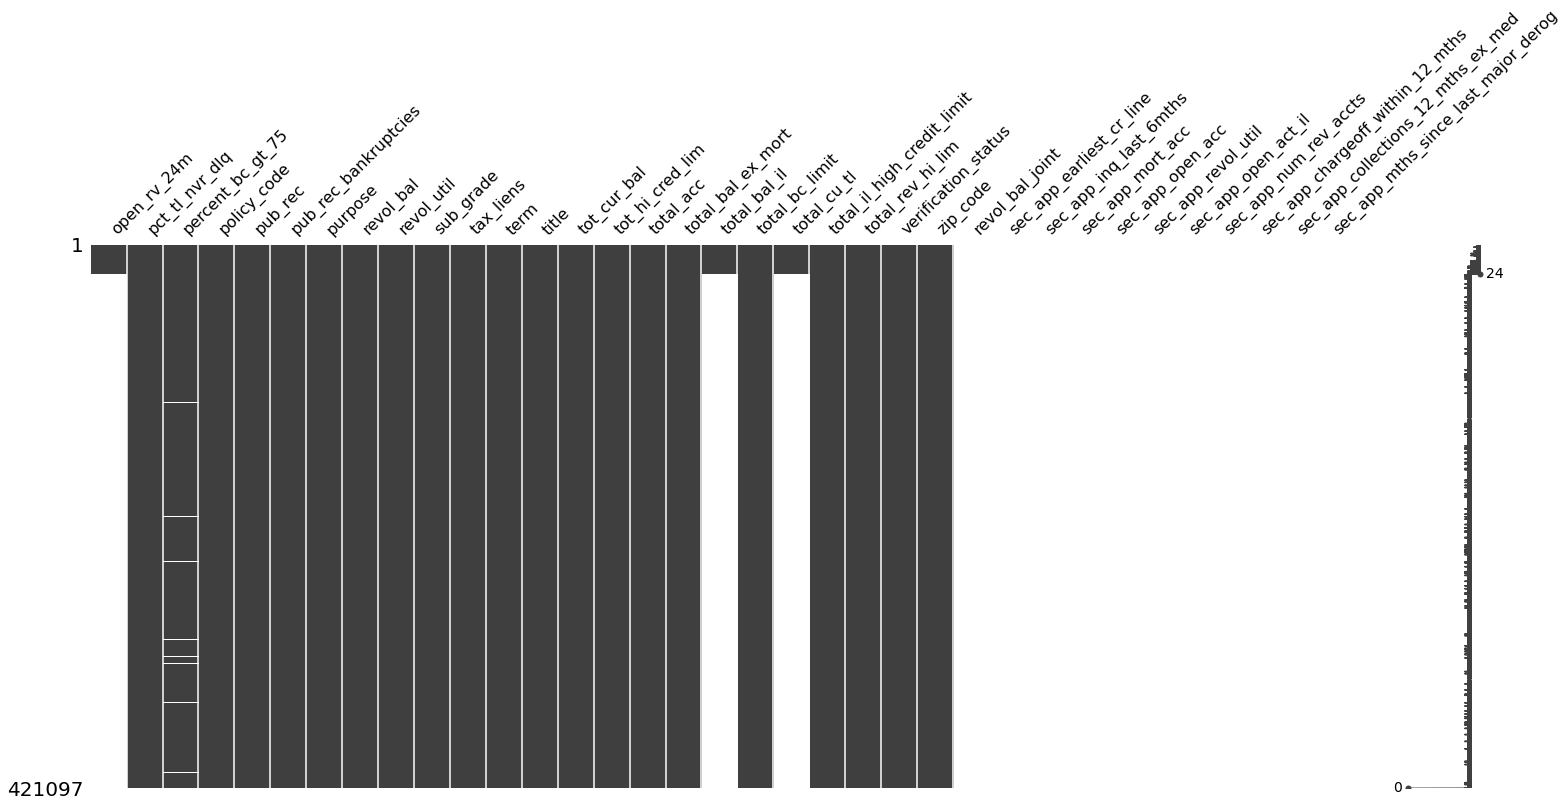

In [28]:
msno.matrix(data.iloc[:,70:105])

### Data Cleaning

We can see that some of the columns have no information at all and some contain very few information (less than 1000 rows), so we may actually drop them.

In [29]:
#data = data.drop(['annual_inc_joint', 'desc', 'dti_joint', 'id', 'member_id', 'revol_bal_joint',
#         'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
#         'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 
#         'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
#         'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog'], axis=1)

In [52]:
data = data.dropna(axis='columns', how='any', thresh=1000)

Let's now count the number of missing values in each column of the rest of the data and sort them.

In [64]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'], ascending=False).head(30)

,count,%
il_util,402480,95.578928
mths_since_rcnt_il,400287,95.058146
all_util,399725,94.924685
inq_fi,399725,94.924685
inq_last_12m,399725,94.924685
max_bal_bc,399725,94.924685
open_acc_6m,399725,94.924685
open_il_12m,399725,94.924685
open_il_24m,399725,94.924685
open_act_il,399725,94.924685


If we look carefully, we can see that some columns contain 399725 or more missing values. Let's see if the rest non-null values are correlated and if the missing values are for the same rows.

In [54]:
# how to choose columns with 21372 non-null values?

<AxesSubplot:>

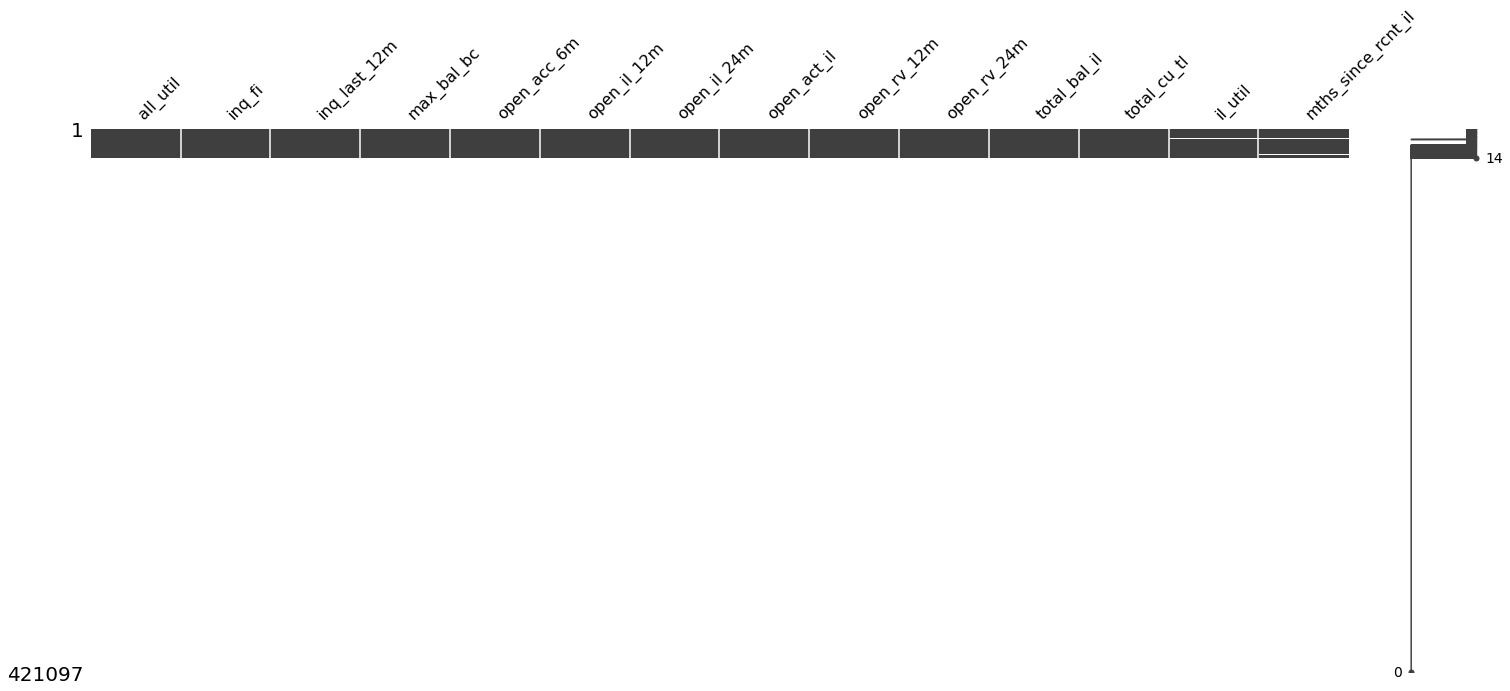

In [58]:
msno.matrix(data[['all_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'open_acc_6m',
                      'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m',
                      'total_bal_il', 'total_cu_tl', 'il_util', 'mths_since_rcnt_il']])

Let's also take a look at the heatmap to see the correlation among the non-missing values:

<AxesSubplot:>

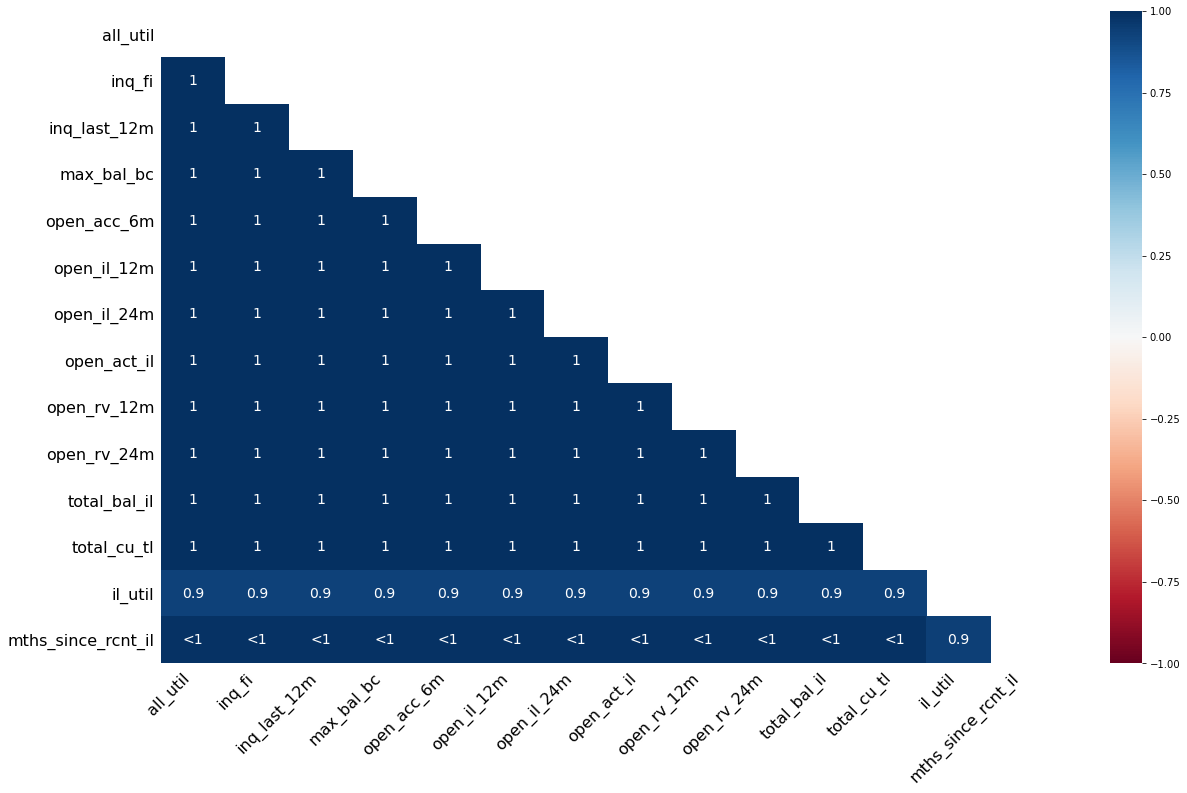

In [59]:
msno.heatmap(data_test[['all_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'open_acc_6m',
                      'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m',
                      'total_bal_il', 'total_cu_tl', 'il_util', 'mths_since_rcnt_il']])

From this we can see that all the missing values of these selected columns are strongly correlated, which suggests that either this data was added from another dataset or it was collected from a single source. We should note that this data (around 20,000 rows) contains about 5% of the whole data set (I am not sure if I need to drop them or not).

In [60]:
# msno.bar(data)

In [ ]:
# data.value_counts().head()